<a href="https://colab.research.google.com/github/vvrgit/AI/blob/main/DigitRecogn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
#from keras import utils as np_utils
from tensorflow.keras import utils

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [86]:
batch_size = 128
num_classes = 10
epochs = 100

In [77]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)               

In [87]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [79]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

Epoch 1/10
469/469 [==============================] - 21s 43ms/step - loss: 2.3136 - accuracy: 0.0929 - val_loss: 2.2988 - val_accuracy: 0.0904
Epoch 2/10
469/469 [==============================] - 20s 42ms/step - loss: 2.3047 - accuracy: 0.1024 - val_loss: 2.2913 - val_accuracy: 0.0963
Epoch 3/10
469/469 [==============================] - 20s 42ms/step - loss: 2.2983 - accuracy: 0.1063 - val_loss: 2.2839 - val_accuracy: 0.1038
Epoch 4/10
469/469 [==============================] - 20s 42ms/step - loss: 2.2921 - accuracy: 0.1123 - val_loss: 2.2767 - val_accuracy: 0.1164
Epoch 5/10
469/469 [==============================] - 20s 42ms/step - loss: 2.2849 - accuracy: 0.1213 - val_loss: 2.2695 - val_accuracy: 0.1389
Epoch 6/10
469/469 [==============================] - 20s 42ms/step - loss: 2.2790 - accuracy: 0.1269 - val_loss: 2.2621 - val_accuracy: 0.1643
Epoch 7/10
469/469 [==============================] - 20s 42ms/step - loss: 2.2724 - accuracy: 0.1362 - val_loss: 2.2548 - val_accuracy:

In [81]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.2313740253448486
Test accuracy: 0.27720001339912415


In [82]:
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5


In [83]:
model = load_model('mnist.h5')


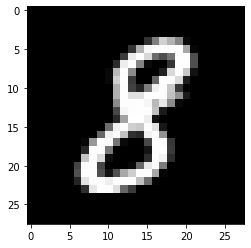

In [84]:
import pylab as plt

plt.imshow(x_test[110].reshape(28,28),cmap='gray')
plt.show()

In [85]:
import numpy as np
prediction = model.predict(x_test[101:102])
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[0])

Prediction Score:
 [0.12801477 0.06683127 0.09338338 0.10666414 0.08884735 0.11641973
 0.12298699 0.084129   0.10354714 0.08917622]

Thresholded Score:
 [0 0 0 0 0 0 0 0 0 0]

Predicted Digit:
 []
